In [12]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.metrics import fbeta_score, make_scorer
import matplotlib.pyplot as plt

# Laden des Datensatzes
df = pd.read_csv('../data/GeneralDatensatz18-21ohneGeo-mitLockdown_mitCorona.csv', sep=';')

# Features und Zielvariable definieren
X = df[['UMONAT','USTUNDE','UWOCHENTAG','UART','USTRZUSTAND','BEZ','UTYP1','ULICHTVERH','IstRad','IstPKW','IstFuss','IstKrad','IstGkfz','IstSonstige', 'LOCKDOWN', 'COVID']]
y = df['UKATEGORIE'].isin([1, 2]).astype(int)  # 1 für schwere/tödliche Unfälle, 0 für leichte Unfälle

# KFold-Konfiguration
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Definieren des F-beta-Scores mit beta = 2
beta = 3
fbeta_scorer = make_scorer(fbeta_score, beta=beta)

##Parameter für Hyperparametertuning
logistic__C = [0.001, 0.01, 0.1, 1, 10, 100]
logistic__max_iter = [100, 1000, 10000]
logistic__tol = [1e-4, 1e-3, 1e-2]
logistic__penalty = ['l2', 'l1', 'elasticnet']
logistic__solver = ['lbfgs', 'liblinear', 'sag', 'saga']

#logistic__C: Dieser Hyperparameter steuert die Stärke der Regularisierung. Niedrigere Werte bedeuten stärkere Regularisierung, was hilfreich sein kann, um Überanpassung zu vermeiden, besonders wenn die Daten unbalanciert sind und das Modell dazu neigt, die Mehrheitsklasse zu bevorzugen.  
#logistic__penalty: Bestimmt den Typ der Regularisierung. 'l2' ist die Standardoption, die dazu neigt, die Gewichte gleichmäßig zu verkleinern, was bei unbalancierten Daten nützlich sein kann, um die Komplexität des Modells zu kontrollieren.  
#logistic__solver: Der 'lbfgs'-Solver unterstützt die L2-Regularisierung und ist effizient für kleine Datensätze. Die Wahl des Solvers kann die Konvergenzgeschwindigkeit und die Handhabung von unbalancierten Daten beeinflussen.  
#logistic__max_iter: Die maximale Anzahl von Iterationen, die der Solver für die Konvergenz durchführt. Bei unbalancierten Daten kann es notwendig sein, diesen Wert zu erhöhen, um eine bessere Anpassung zu erzielen.  
#logistic__tol: Die Toleranz für das Stoppkriterium. Eine feinere Toleranz kann bei unbalancierten Daten helfen, indem sie sicherstellt, dass das Modell gründlich optimiert wird. 


C_value: 0.001 Fbeta Score Logistische Regression (k-fold): 0.6271205696954787
C_value: 0.01 Fbeta Score Logistische Regression (k-fold): 0.6247574970883465
C_value: 0.1 Fbeta Score Logistische Regression (k-fold): 0.6245684264374036
C_value: 1 Fbeta Score Logistische Regression (k-fold): 0.6244433812689868
C_value: 10 Fbeta Score Logistische Regression (k-fold): 0.6248062417421931
C_value: 100 Fbeta Score Logistische Regression (k-fold): 0.6246724467261828


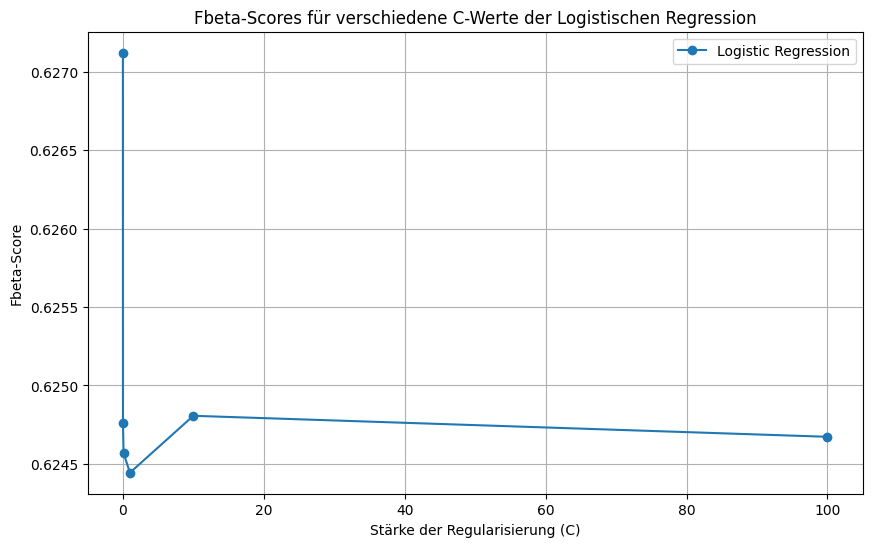

In [2]:
logReg_logistic__C = []

for C_value in logistic__C:
    log_reg = LogisticRegression(C=C_value, max_iter=1000, class_weight={0: 1, 1: 9})
    fbeta_reg = cross_val_score(log_reg, X, y, cv=kf, scoring=fbeta_scorer)
    print(f"C_value: {C_value} Fbeta Score Logistische Regression (k-fold): {fbeta_reg.mean()}")
    logReg_logistic__C.append(fbeta_reg.mean())
    

# Fbeta-Scores plotten
plt.figure(figsize=(10, 6))
plt.plot(logistic__C, logReg_logistic__C, marker='o', label='Logistic Regression')
plt.title('Fbeta-Scores für verschiedene C-Werte der Logistischen Regression')
plt.xlabel('Stärke der Regularisierung (C)')
plt.ylabel('Fbeta-Score')
plt.legend()
plt.grid(True)
plt.show()


/home/lisa/Code/Python/data_science1/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/lisa/Code/Python/data_science1/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

max_iter_value: 100 Fbeta Score Logistische Regression (k-fold): 0.624344034497286
max_iter_value: 1000 Fbeta Score Logistische Regression (k-fold): 0.6244433812689868
max_iter_value: 10000 Fbeta Score Logistische Regression (k-fold): 0.6244433812689868


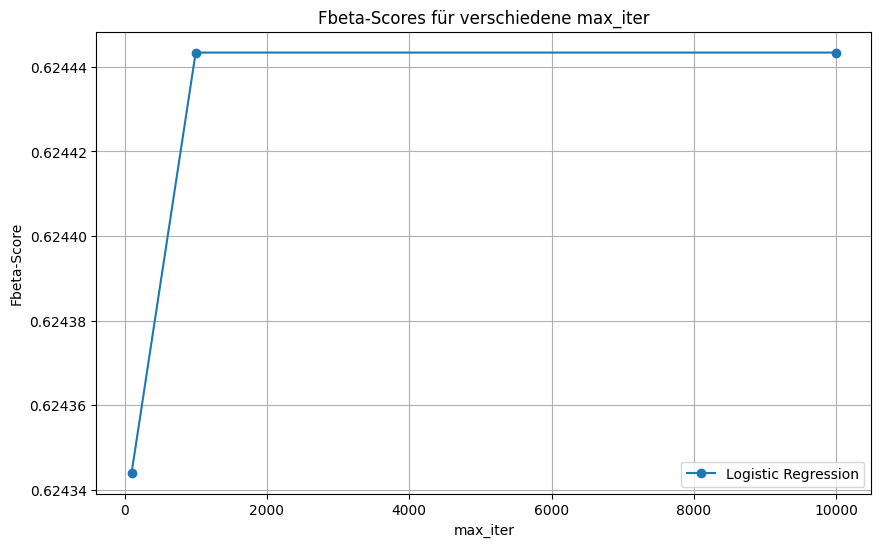

In [3]:

logReg_max_iter = []
for max_iter_value in logistic__max_iter:
    log_reg = LogisticRegression(C=10, max_iter=max_iter_value, class_weight={0: 1, 1: 9})
    fbeta_reg = cross_val_score(log_reg, X, y, cv=kf, scoring=fbeta_scorer)
    print(f"max_iter_value: {max_iter_value} Fbeta Score Logistische Regression (k-fold): {fbeta_reg.mean()}")
    logReg_max_iter.append(fbeta_reg.mean())

# Fbeta-Scores plotten
plt.figure(figsize=(10, 6))
plt.plot(logistic__max_iter, logReg_max_iter, marker='o', label='Logistic Regression')
plt.title('Fbeta-Scores für verschiedene max_iter')
plt.xlabel('max_iter')
plt.ylabel('Fbeta-Score')
plt.legend()
plt.grid(True)
plt.show()

tol_value: 0.0001 Fbeta Score Logistische Regression (k-fold): 0.6248062417421931
tol_value: 0.001 Fbeta Score Logistische Regression (k-fold): 0.6248062417421931
tol_value: 0.01 Fbeta Score Logistische Regression (k-fold): 0.6248062417421931


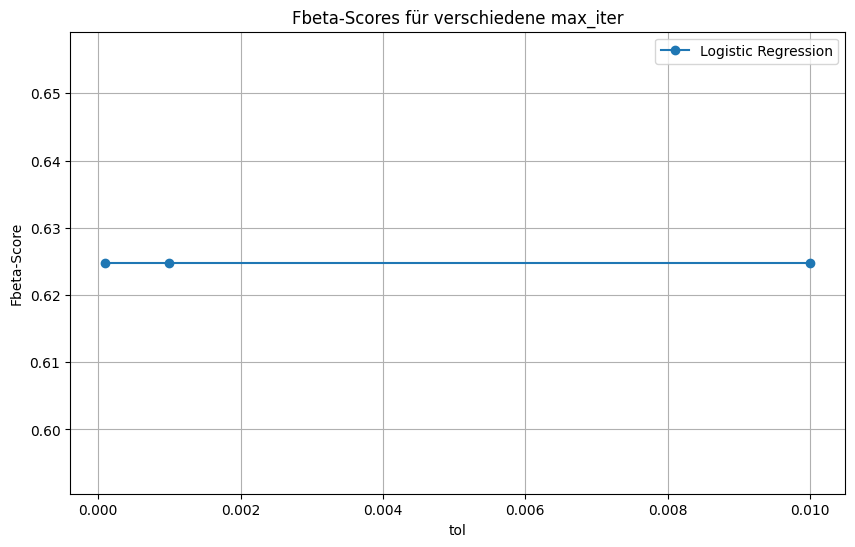

In [6]:
logReg_tol = []
for tol_value in logistic__tol:
    log_reg = LogisticRegression(C=10, max_iter=1000, class_weight={0: 1, 1: 9})
    fbeta_reg = cross_val_score(log_reg, X, y, cv=kf, scoring=fbeta_scorer)
    print(f"tol_value: {tol_value} Fbeta Score Logistische Regression (k-fold): {fbeta_reg.mean()}")
    logReg_tol.append(fbeta_reg.mean())

# Fbeta-Scores plotten
plt.figure(figsize=(10, 6))
plt.plot(logistic__tol, logReg_tol, marker='o', label='Logistic Regression')
plt.title('Fbeta-Scores für verschiedene max_iter')
plt.xlabel('tol')
plt.ylabel('Fbeta-Score')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
logReg_penalty = []
for penalty_value in logistic__penalty:
    log_reg = LogisticRegression(C=10, max_iter=1000, penalty=penalty_value, class_weight={0: 1, 1: 9})
    fbeta_reg = cross_val_score(log_reg, X, y, cv=kf, scoring=fbeta_scorer)
    print(f"penalty_value: {penalty_value} Fbeta Score Logistische Regression (k-fold): {fbeta_reg.mean()}")
    logReg_penalty.append(fbeta_reg.mean())
    
# Fbeta-Scores plotten
plt.figure(figsize=(10, 6))
plt.plot(logistic__penalty, logReg_penalty, marker='o', label='Logistic Regression')
plt.title('Fbeta-Scores für verschiedene penalty')
plt.xlabel('penalty')
plt.ylabel('Fbeta-Score')
plt.legend()
plt.grid(True)
plt.show()


penalty_value: l2 Fbeta Score Logistische Regression (k-fold): 0.6248062417421931


ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/home/lisa/Code/Python/data_science1/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/lisa/Code/Python/data_science1/.venv/lib/python3.12/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/lisa/Code/Python/data_science1/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py", line 1172, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/lisa/Code/Python/data_science1/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py", line 67, in _check_solver
    raise ValueError(
ValueError: Solver lbfgs supports only 'l2' or None penalties, got l1 penalty.


In [ ]:
logReg_solver = []
for solver_value in logistic__solver:
    log_reg = LogisticRegression(C=10, max_iter=1000, solver=solver_value, class_weight={0: 1, 1: 9})
    fbeta_reg = cross_val_score(log_reg, X, y, cv=kf, scoring=fbeta_scorer)
    print(f"solver_value: {solver_value} Fbeta Score Logistische Regression (k-fold): {fbeta_reg.mean()}")
    logReg_solver.append(fbeta_reg.mean())
    
# Fbeta-Scores plotten
plt.figure(figsize=(10, 6))
plt.plot(logistic__solver, logReg_solver, marker='o', label='Logistic Regression')
plt.title('Fbeta-Scores für verschiedene solver')
plt.xlabel('solver')
plt.ylabel('Fbeta-Score')
plt.legend()
plt.grid(True)
plt.show()


solver_value: lbfgs Fbeta Score Logistische Regression (k-fold): 0.6248062417421931
solver_value: liblinear Fbeta Score Logistische Regression (k-fold): 0.6248055797630908


/home/lisa/Code/Python/data_science1/.venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
